<a href="https://colab.research.google.com/github/nwferreri/matching/blob/main/matching_catholic_public_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matching - Catholic School vs Public School, Standardized Test Scores

## Directory, Libraries, and Data

In [ ]:
# Directory
%cd /content/drive/MyDrive/ZTM/Python for Business/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/ZTM/Python for Business/Econometrics and Causal Inference/Matching


In [ ]:
# Install Libraries
!pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [ ]:
# Load data
df = pd.read_csv('school.csv')
df.head()

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0001010C,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,0001011C,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0001012C,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


In [ ]:
# Drop childid column, not needed
df = df.drop(columns='childid')
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   catholic             5429 non-null   int64  
 1   race                 5429 non-null   object 
 2   number_places_lived  5429 non-null   int64  
 3   mom_age              5429 non-null   int64  
 4   dad_age              5429 non-null   int64  
 5   dad_education        5429 non-null   object 
 6   mom_education        5429 non-null   object 
 7   mom_score            5429 non-null   float64
 8   dad_score            5429 non-null   float64
 9   income               5429 non-null   float64
 10  poverty              5429 non-null   int64  
 11  food_stamps          5429 non-null   int64  
 12  score_standardized   5429 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 551.5+ KB


## Data Analysis

In [ ]:
# Compare the averages of both groups
df.groupby('catholic').mean(numeric_only=True)

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


Use T-Test to check if groups are different across continuous variables.

In [ ]:
# Get continuous variables
continuous = ['number_places_lived', 'mom_age', 'dad_age',
              'mom_score', 'dad_score', 'income']

# Storing results
stat = {}
p = {}

# Loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x]
  group2 = df.where(df.catholic == 1).dropna()[x]
  stat[x], p[x] = ss.ttest_ind(group1, group2)

# Turn results into dataframe
ttests = pd.DataFrame.from_dict(p, orient='Index')
ttests.columns = ['pvalue']
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


All p-values are < 0.05, so the groups are different.

Next use Chi-square test to check if groups are different across binary variables.

In [ ]:
# Get binary variables
binary = ['poverty', 'food_stamps']

# Storing results
p = {}

# Loop
for x in binary:
  tab = pd.crosstab(index=df[x],
                    columns = df.catholic)
  stat, p[x], dof, exp = ss.chi2_contingency(tab)

# Turn results into dataframe
chi2_tests = pd.DataFrame.from_dict(p, orient='Index')
chi2_tests.columns = ['pvalue']
print(chi2_tests)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


Again, the p-values are very small, so the groups are different.

## Data Preparation

Collapse some categorical variables to avoid Curse of Dimensionaility.

In [ ]:
# Race variable
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

We can create the following buckets:
* White
* Hispanic
* Black
* Asian
* Other

In [ ]:
# Transforming race variable
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |  # vertical bar indicates OR
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)

# Leave out race_other because it would fall into dummy variable trap
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,1,0,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,1,0,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,1,0,0,0


In [ ]:
# Education variable
df.mom_education.value_counts()

SOME COLLEGE                              1721
HIGH SCHOOL DIPLOMA/EQUIVALENT            1306
BACHELOR'S DEGREE                         1085
MASTER'S DEGREE (MA, MS)                   387
VOC/TECH PROGRAM                           294
9TH - 12TH GRADE                           222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     170
8TH GRADE OR BELOW                         134
DOCTORATE OR PROFESSIONAL DEGREE           110
Name: mom_education, dtype: int64

We can do:

* Higher education degree
* Other

In [ ]:
# Transforming education variable
df['dad_higher_education'] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df['mom_higher_education'] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0,1,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,1,0,0,0,1,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,1,0,0,0,1,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,1,0,0,0,1,1


In [ ]:
# Clean the dataframe
df = df.drop(columns=['race', 'dad_education', 'mom_education'])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [ ]:
# Isolate confounders, treatment variable, y
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns=['catholic', 'score_standardized']).values
treat

array([0, 0, 0, ..., 0, 0, 0])

## Common Support Region

In [ ]:
# Logistic Regression
import statsmodels.api as sm
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8


In [ ]:
# Predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [ ]:
# Visualize CSR
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26041384],
       [0.        , 0.17273291],
       [0.        , 0.24596599],
       ...,
       [0.        , 0.23182116],
       [0.        , 0.12192314],
       [0.        , 0.1825144 ]])

In [ ]:
# Split between treated and non_treated
non_treated = df_prob[:, 0] == 0
non_treated = df_prob[non_treated, 1]
treated = df_prob[:, 0] == 1
treated = df_prob[treated, 1]

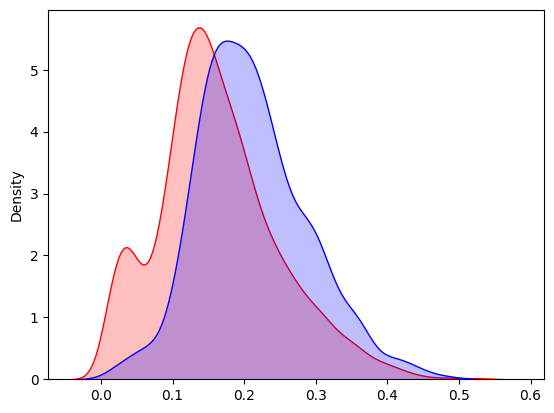

In [ ]:
# Plot CSR
sns.kdeplot(non_treated, fill=True, color='red')
sns.kdeplot(treated, fill=True, color='blue');

The is a lot of overlap between the curves, so we can be confident in the quality of the matched group.

## Matching Model

In [ ]:
# Matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)

/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



In this case, we care about ATE because we want to know the potential effect of Catholic school on test scores.

The ATE value above is -0.133, indicating that students in Catholic schools would perform worse on standardized tests. The p-value is borderline, but would indicate statistical significance.

## Robustness Checks

How can we strengthen the causality effect?

### Repeated Samples

In [ ]:
# While loop
ate = {}
i = 0

# Loop
while i < 1000:
  # Sampling
  sample = df.sample(1000)  # about 20% of the data

  # Isolate treat, y, confounders
  treat = sample.catholic.values
  y = sample.score_standardized.values
  confounders = sample.drop(columns=['catholic',
                                     'score_standardized']).values

  # Matching model
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj=True)

  # Store the results
  ate[i] = model.estimates['matching']['ate']

  print(i)  # So we can see how it's doing
  i += 1

Axes(0.125,0.11;0.775x0.77)
-0.12754206450119743


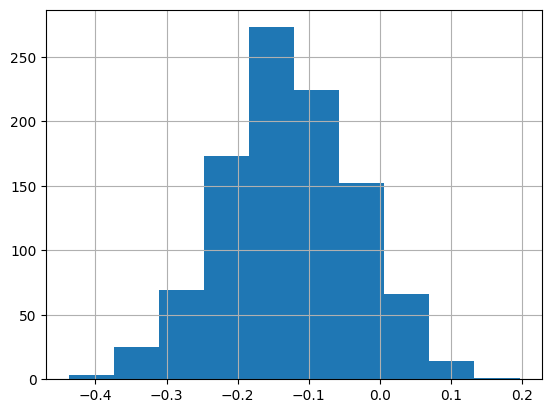

In [ ]:
# Visualize results
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

The average ATE of -0.128 is very similar to the one we obtained earlier of -0.133, strengthening our analysis.

### Removing 1 confounder

In [ ]:
df.columns

Index(['catholic', 'number_places_lived', 'mom_age', 'dad_age', 'mom_score',
       'dad_score', 'income', 'poverty', 'food_stamps', 'score_standardized',
       'race_white', 'race_hispanic', 'race_black', 'race_asian',
       'dad_higher_education', 'mom_higher_education'],
      dtype='object')

In [ ]:
# New confounder list
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns=['catholic',
                               'score_standardized',
                               'number_places_lived']).values

In [ ]:
# Matching Model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)

/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.137      0.066     -2.069      0.039     -0.266     -0.007
           ATC     -0.136      0.074     -1.842      0.065     -0.281      0.009
           ATT     -0.141      0.060     -2.348      0.019     -0.259     -0.023



We again obtain a similar ATE to the other results.

## Conclusions

Based on our analysis, we can reasonable say that students in Catholic schools perform worse on standardized tests than their counterparts in public schools.